In [1]:
from gensim import corpora, models
import re
from pprint import pprint 

In [2]:
###   POS Tagger
import nltk
from nltk import Text
from nltk.tokenize import line_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
from nltk import bigrams, trigrams, ngrams


In [3]:
from HTMLParser import HTMLParser

# create a subclass and override the handler methods
class MyHTMLParser(HTMLParser):
    def __init__(self):
        HTMLParser.__init__(self)
        self.flag = 0
        self.data = []

    def handle_starttag(self, tag, attrs):
        if tag == 'text':
            self.flag = 1

    def handle_endtag(self, tag):
        if tag == 'text':
            self.flag = 0
        
    def handle_data(self, data):
        if self.flag:
            self.data.append(data)
            
parser = MyHTMLParser()

In [77]:
f = '/Users/ynh3/Data/AP/AP890101'
with open(f, 'r') as content_file:
    content = content_file.read()
parser.feed(content)

In [78]:
len(parser.data)

90

In [79]:
###documents
stoplist = set([line.replace("\n","") for line in open('/Users/ynh3/Data/stopword-list.txt')])
pun = [',', '-','.', ':', '(', ')', '--', ';', '...', 'may', 'must', 'us', 'via','a','the', 'rt', 'gg', 'gt', 'lt', 'la', 'de', 'te', 'lol', 'follow', 'followers', 'unfollow', 'unfollowers', 'unfollower', 'follower']
#stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist and word not in pun]
        for document in parser.data]

In [80]:
len(texts)

90

In [99]:
#texts

In [81]:
text_words=[]
#for i in range(0, len(parser.data)):
j=90
total_len = 0
for i in range(0, j):
    words = word_tokenize(parser.data[i])
    pos = nltk.pos_tag(words)
    np_words = [word for word, tag in pos if 'NNP' in tag and word not in stoplist and word not in pun]
    text_words.append(np_words)
    total_len += len(np_words)


In [82]:
len(text_words)

90

In [83]:
#pos

In [84]:
#np_words

In [85]:
dictionary = corpora.Dictionary(text_words)
dictionary.save('/tmp/AP890101.dict') # store the dictionary, for future reference
print(dictionary)

Dictionary(1510 unique tokens: [u'Sugar', u'Communist', u'Slasher', u'Ronald', u'Shirley']...)


In [87]:
corpus = [dictionary.doc2bow(t) for t in text_words]

In [88]:
len(corpus)

90

In [89]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [90]:
n_cluster = len(corpus)
# LSI computing
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=n_cluster) # initialize an LSI transformation
corpus_lsi = lsi[corpus] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [91]:
lsi.show_topics()

[u'0.594*"New" + 0.483*"Year" + 0.358*"Sunday" + 0.156*"Eve" + 0.109*"Rio" + 0.101*"Saturday" + 0.097*"Arafat" + 0.089*"Castro" + 0.087*"West" + 0.081*"President"',
 u'0.449*"Arafat" + 0.334*"Palestinians" + 0.333*"Israel" + 0.246*"PLO" + -0.214*"New" + 0.212*"Bank" + 0.202*"West" + 0.185*"Gaza" + 0.184*"Fatah" + -0.183*"Year"',
 u'0.693*"Castro" + 0.390*"Cuba" + 0.308*"America" + 0.260*"Latin" + 0.130*"Cuban" + -0.120*"New" + 0.104*"United" + 0.101*"States" + -0.092*"Year" + 0.089*"Union"',
 u'-0.293*"Kim" + -0.264*"Korea" + -0.243*"North" + -0.243*"South" + -0.212*"Washington" + -0.192*"George" + -0.179*"Vietnam" + -0.175*"County" + -0.165*"St." + 0.163*"Year"',
 u'0.355*"Kim" + 0.325*"Korea" + -0.281*"Washington" + -0.225*"St." + -0.221*"George" + 0.218*"South" + 0.213*"North" + -0.181*"County" + -0.160*"River" + -0.150*"Virgin"',
 u'-0.423*"Ms." + -0.420*"Alptekin" + -0.258*"Vietnam" + 0.165*"Kim" + 0.151*"Korea" + -0.135*"University" + 0.132*"George" + 0.129*"North" + -0.123*"Bate

In [92]:
lsi.print_topic(16,topn=10)

u'0.463*"Gadi" + 0.332*"Israeli" + 0.318*"Lebanon" + 0.290*"Israel" + -0.255*"Arafat" + 0.198*"Yossi" + 0.198*"Avivim" + 0.152*"Shiite" + 0.140*"Amal" + 0.132*"Kibbutz"'

In [ ]:
######   LSI MODELING

In [93]:
    import numpy as np
    
    lsi_topic_labels=[]
    for i,doc in enumerate(lsi[corpus_tfidf]):
        a = np.array(doc)
        absA= abs(a)
        if (len(a)==0):
            cluster_id=0
            prob_value=0.0
            j=j+1
        else:
            try:
                topicmax = absA.argmax(axis=0)
            except ValueError:
                print "ValueError at"
                print i
                #print a
            cluster_id = a[topicmax.item(1)][0]
            prob_value = abs(a[topicmax.item(1)][1])

        triple = i, cluster_id, prob_value
        lsi_topic_labels.append(triple)
        #print triple
        l = lsi.print_topic(cluster_id,topn=10)
        prob_list = [(abs(float(a[:5])),a[6:])  for a in (l.split('+ '))]
        sorted(prob_list)
        t_words = [w[1] for w in prob_list]
        print "doc#",i, ":", "topic:",cluster_id, ",",t_words
        i=i+1

doc# 0 : topic: 6.0 , [u'"Vietnam" ', u'*"Sunday" ', u'*"Ms." ', u'*"Alptekin" ', u'*"North" ', u'*"U.S." ', u'*"Campbell" ', u'"New" ', u'*"Kim" ', u'"Foner"']
doc# 1 : topic: 7.0 , [u'"Alptekin" ', u'"Ms." ', u'*"Bateau" ', u'*"Mouche" ', u'*"Sunday" ', u'*"Campbell" ', u'*"Rio" ', u'*"Saturday" ', u'*"U.S." ', u'"New"']
doc# 2 : topic: 50.0 , [u'*"Price" ', u'"Tabor" ', u'*"Fire" ', u'*"Doughty" ', u'"Belcher" ', u'*"United" ', u'"Holcomb" ', u'"Knowles" ', u'*"Killingsworth" ', u'*"Garcia"']
doc# 3 : topic: 30.0 , [u'*"Turner" ', u'*"Police" ', u'*"House" ', u'*"Wild" ', u'*"Columbia" ', u'*"Washington" ', u'"Los" ', u'*"Mrs." ', u'*"Najib" ', u'"Angeles"']
doc# 4 : topic: 69.0 , [u'"Sen." ', u'"James" ', u'"Hankins" ', u'"Press" ', u'"Federal" ', u'"Wirth" ', u'"Wall" ', u'"Timothy" ', u'"Sasser" ', u'"Loan"']
doc# 5 : topic: 35.0 , [u'*"Washington" ', u'*"Holcomb" ', u'"Lima" ', u'*"Square" ', u'*"Lombardo" ', u'*"Guy" ', u'*"Times" ', u'*"Orchestra" ', u'*"Conover" ', u'*"Colora

In [65]:
lsi_topic_labels[1]

(1, 12.0, 0.34600582040158262)

In [64]:
    from operator import itemgetter
    from collections import Counter
    topics = []
    for i in range(0, n_cluster):
        l = lsi.print_topic(i,topn=10)
        prob_list = [(abs(float(a[:5])),a[6:])  for a in (l.split('+ '))]
        sorted(prob_list)
        topics.append(prob_list)


    ###MAKING READY FOR
    cluster_topic_list = sorted(lsi_topic_labels,key=itemgetter(1,2), reverse=True)

    cluster_list = sorted(lsi_topic_labels,key=lambda x: x[1])
    counter = Counter(b for a,b,c in cluster_list)
    counter_sort = counter.most_common(n_cluster)
    cid_sort = [e[0] for e in counter_sort]

    print 'length of lsi_topic_labels is {}'.format(len(lsi_topic_labels))
    print 'length of cluster_list is {}'.format(len(cluster_list))
    print 'length of counter_sort is {}'.format(len(counter_sort))
    print 'n_cluster is {}'.format(n_cluster)
    print 'cid_sort is {}'.format(len(cid_sort))


length of lsi_topic_labels is 20
length of cluster_list is 20
length of counter_sort is 18
n_cluster is 20
cid_sort is 18


In [60]:
lsi_topic_labels[0]

(0, 2.0, 0.6883743174340845)

In [106]:
cluster_topic_list[0]

(73, 89.0, 1.0)

In [65]:
l = []
t=[]
for x in topics:
    m = [x[i][1] for i in range(0,len(x))]
    if (len(m)>0):
        t.append(m)
        

In [128]:
#texts[0]

In [103]:
n_cluster = len(corpus)
# LSI computing
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=n_cluster, chunksize=10, update_every=5, passes=5) # initialize an LSI transformation
corpus_lda = lda[corpus] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [104]:
    import numpy as np
    
    lda_topic_labels=[]
    for i,doc in enumerate(lda[corpus]):
        a = np.array(doc)
        absA= abs(a)
        if (len(a)==0):
            cluster_id=0
            prob_value=0.0
            j=j+1
        else:
            try:
                topicmax = absA.argmax(axis=0)
            except ValueError:
                print "ValueError at"
                print i
                #print a
            cluster_id = a[topicmax.item(1)][0]
            prob_value = abs(a[topicmax.item(1)][1])

        triple = i, cluster_id, prob_value
        lda_topic_labels.append(triple)
        #print triple
        l = lda.print_topic(cluster_id,topn=10)
        prob_list = [(abs(float(a[:5])),a[6:])  for a in (l.split('+ '))]
        sorted(prob_list)
        t_words = [w[1] for w in prob_list]
        print "doc#",i, ":", "topic:",cluster_id, ",",t_words
        i=i+1

doc# 0 : topic: 38.0 , [u'Vietnam ', u'Stone ', u'University ', u'War ', u'Foner ', u'Mississippi ', u'Platoon ', u'Empty ', u'Burning ', u'South']
doc# 1 : topic: 70.0 , [u'Ms. ', u'Alptekin ', u'IBM ', u'Manufacturing ', u'Society ', u'Engineers ', u'Great ', u'Feb. ', u'Borchelt ', u'Studies']
doc# 2 : topic: 46.0 , [u'Fire ', u'Price ', u'Mrs. ', u'Chief ', u'Saturday ', u'Francis ', u'Garcia ', u'Wichita ', u'Killingsworth ', u'St.']
doc# 3 : topic: 28.0 , [u'Turner ', u'Washington ', u'District ', u'America ', u'Police ', u'Jay ', u'Wild ', u'Columbia ', u'Attorney ', u'White']
doc# 4 : topic: 62.0 , [u'Washington ', u'Bank ', u'George ', u'St. ', u'County ', u'City ', u'River ', u'Virgin ', u'Arizona ', u'India']
doc# 5 : topic: 32.0 , [u'New ', u'Year ', u'Boston ', u'Lombardo ', u'Square ', u'Guy ', u'L ', u'Harbor ', u'Street ', u'Orchestra']
doc# 6 : topic: 33.0 , [u'New ', u'Year ', u'Jersey ', u'Eve ', u'Detroit ', u'Philadelphia ', u'George ', u'Boston ', u'Waas ', u'Satu

In [122]:
parser.data[0]

"\n   The celluloid torch has been passed to a new\ngeneration: filmmakers who grew up in the 1960s.\n   ``Platoon,'' ``Running on Empty,'' ``1969'' and ``Mississippi\nBurning'' are among the movies released in the past two years from\nwriters and directors who brought their own experiences of that\nturbulent decade to the screen.\n   ``The contemporaries of the '60s are some of the filmmakers of\nthe '80s. It's natural,'' said Robert Friedman, the senior vice\npresident of worldwide advertising and publicity at Warner Bros.\n   Chris Gerolmo, who wrote the screenplay for ``Mississippi\nBurning,'' noted that the sheer passage of time has allowed him and\nothers to express their feelings about the decade.\n   ``Distance is important,'' he said. ``I believe there's a lot of\nthinking about that time and America in general.''\n   The Vietnam War was a defining experience for many people in the\n'60s, shattering the consensus that the United States had a right,\neven a moral duty to interv

In [23]:
from nltk.tag import pos_tag

sentence = "Michael jackson likes to eat at McDonalds"
tagged_sent = pos_tag(sentence.split())
# [('Michael', 'NNP'), ('Jackson', 'NNP'), ('likes', 'VBZ'), ('to', 'TO'), ('eat', 'VB'), ('at', 'IN'), ('McDonalds', 'NNP')]

propernouns = [word for word,pos in tagged_sent if pos == 'NNP']
# ['Michael','Jackson', 'McDonalds']

In [24]:
propernouns

['Michael', 'McDonalds']

In [29]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import SpaceTokenizer

sentence = "i spoke with sumit and rajesh and Samit about the gridlock situation last night @ around 8 pm last nite"
tokenizer = SpaceTokenizer()
toks = tokenizer.tokenize(sentence)
pos = pos_tag(toks)
chunked_nes = ne_chunk(pos) 

nes = [' '.join(map(lambda x: x[0], ne.leaves())) for ne in chunked_nes if isinstance(ne, nltk.tree.Tree)]

In [30]:
nes

[u'Samit']

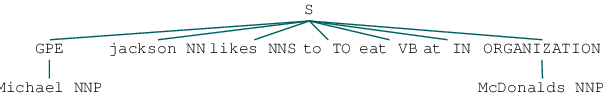

In [27]:
chunked_nes